In [58]:
### pipenv install scikit-learn pandas plotly matplotlib pingouin nbformat ipykernel optuna ipywidgets gradio

# EDA
import pandas as pd
import numpy as np
import pingouin as pg
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt 

# ML
from sklearn.model_selection import cross_validate, StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Hyperparameter optimization
import optuna


In [59]:
# Carregar o dataset
df_segmento = pd.read_csv('./datasets/dataset_segmento_cliente.csv')

### EDA

In [60]:
# visualizar os dados 
df_segmento.head(10)

,atividade_economica,faturamento_mensal,numero_de_funcionarios,localizacao,idade,inovacao,segmento_de_cliente
0,Comércio,713109.95,12,Rio de Janeiro,6,1,Bronze
1,Comércio,790714.38,9,São Paulo,15,0,Bronze
2,Comércio,1197239.33,17,São Paulo,4,9,Silver
3,Indústria,449185.78,15,São Paulo,6,0,Starter
4,Agronegócio,1006373.16,15,São Paulo,15,8,Silver
5,Serviços,1629562.41,16,Rio de Janeiro,11,4,Silver
6,Serviços,771179.95,13,Vitória,0,1,Starter
7,Serviços,707837.61,16,São Paulo,10,6,Silver
8,Comércio,888983.66,17,Belo Horizonte,10,1,Bronze
9,Indústria,1098512.64,13,Rio de Janeiro,9,3,Bronze


In [61]:
# Estrutura do dataset
df_segmento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   atividade_economica     500 non-null    object 
 1   faturamento_mensal      500 non-null    float64
 2   numero_de_funcionarios  500 non-null    int64  
 3   localizacao             500 non-null    object 
 4   idade                   500 non-null    int64  
 5   inovacao                500 non-null    int64  
 6   segmento_de_cliente     500 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 27.5+ KB


In [62]:
# valores possíveis - Variaveis categoricas
df_segmento['atividade_economica'].unique()

array(['Comércio', 'Indústria', 'Agronegócio', 'Serviços'], dtype=object)

In [63]:
# valores possíveis - Variaveis categoricas
df_segmento['localizacao'].unique()

array(['Rio de Janeiro', 'São Paulo', 'Vitória', 'Belo Horizonte'],
      dtype=object)

In [64]:
# valores possíveis - Variaveis categoricas
df_segmento['segmento_de_cliente'].unique()

array(['Bronze', 'Silver', 'Starter', 'Gold'], dtype=object)

In [65]:
# valores possíveis - Variaveis categoricas
df_segmento['inovacao'].unique()

array([1, 0, 9, 8, 4, 6, 3, 7, 5, 2])

In [66]:
# Distribuição da variavel segmento_de_cliente (target)
contagem_target = df_segmento['segmento_de_cliente'].value_counts()
contagem_target

segmento_de_cliente
Silver     260
Bronze     202
Starter     22
Gold        16
Name: count, dtype: int64

In [67]:
# Criar uma lista ordenada do target
lista_segmentos = ['Starter', 'Bronze', 'Silver', 'Gold']

In [68]:
# distribuição da variavel - Contagem
px.bar(contagem_target,color=contagem_target.index ,
       category_orders={'segmento_de_cliente': lista_segmentos}, 
       title='Distribuição da variável target')

In [69]:
# Distribuição da variavel Target - Percentual
percentual_target = contagem_target / len(df_segmento) * 100
px.bar(percentual_target,color=percentual_target.index ,
       category_orders={'segmento_de_cliente': lista_segmentos}, 
       title='Distribuição da variável target')

In [70]:
# Distribuição da variavel Localização
percentual_localizacao = df_segmento.value_counts('localizacao') / len(df_segmento) * 100
px.bar(percentual_localizacao,color=percentual_localizacao.index ,
       title='Distribuição da variável target')

In [71]:
# Distribuição da variavel Atividade economica
percentual_atividade = df_segmento.value_counts('atividade_economica') / len(df_segmento) * 100
px.bar(percentual_atividade,color=percentual_atividade.index ,
       title='Distribuição da variável target')

In [72]:
# Distribuição da variavel Inovação
percentual_inovacao = df_segmento.value_counts('inovacao') / len(df_segmento) * 100
px.bar(percentual_inovacao,color=percentual_inovacao.index ,
       title='Distribuição da variável target')

In [73]:
# Tabela de contingência entre localização e Target (segmento de cliente)
crosstab_localizacao = pd.crosstab(df_segmento['localizacao'], 
                                   df_segmento['segmento_de_cliente'],
                                     margins=True)[lista_segmentos].reset_index()

tabela_localizacao = ff.create_table(crosstab_localizacao)
#mostrar a crosstab
tabela_localizacao.show()

In [74]:
# Tabela de contingência entre atividade economica e Target (segmento de cliente)
crosstab_atividade = pd.crosstab(df_segmento['atividade_economica'], 
                                 df_segmento['segmento_de_cliente'], 
                                 margins=True)[lista_segmentos].reset_index()

tabela_atividade = ff.create_table(crosstab_atividade)
#mostrar a crosstab
tabela_atividade.show()

In [75]:
# Tabela de contingência entre inovação e Target (segmento de cliente)
crosstab_inovacao = pd.crosstab(df_segmento['inovacao'], 
                                df_segmento['segmento_de_cliente'], 
                                margins=True)[lista_segmentos].reset_index()
tabela_atividade = ff.create_table(crosstab_inovacao)
#mostrar a crosstab
tabela_atividade.show()

In [76]:
# distribuição idade da empresa
px.histogram(df_segmento, x='idade', color='segmento_de_cliente', 
             title='Distribuição da variável idade_empresa')

In [77]:
# distribuição faturamento
px.histogram(df_segmento, x='faturamento_mensal', color='segmento_de_cliente', 
             title='Distribuição da variável faturamento')

In [78]:
# Verificar a correlação entre as variáveis
# Boxplot entre idade e segmento de cliente
px.box(df_segmento, x='segmento_de_cliente', y='idade', 
       title='Boxplot da variável idade por segmento de cliente',
       color='segmento_de_cliente',
       category_orders={'segmento_de_cliente': lista_segmentos})

In [79]:
# Boxplot entre faturamento e segmento de cliente
px.box(df_segmento, x='segmento_de_cliente', y='faturamento_mensal', 
       title='Boxplot da variável faturamento por segmento de cliente',
       color='segmento_de_cliente',
       category_orders={'segmento_de_cliente': lista_segmentos})

In [80]:
# Correlação variáveis qualitativas
# Teste de qui-quadrado de pearson - Teste de independência
# Teste de hipótese
# H0: As variáveis são independentes
# H1: As variáveis são dependentes (não são independentes)
# se o p-valor for menor que 0.05 rejeitamos a hipótese nula
# se o p-valor for maior que 0.05 não rejeitamos a hipótese nula

# Teste de independência entre segmento de cliente e localização
valor_esperado, valor_observado, estatísticas =  pg.chi2_independence(df_segmento, x='segmento_de_cliente', y='localizacao')

/home/srmatheusmaciel/.local/share/virtualenvs/classificacao_arvore_decisao-pApQBjQT/lib/python3.12/site-packages/pingouin/contingency.py:151: UserWarning:

Low count on observed frequencies.

/home/srmatheusmaciel/.local/share/virtualenvs/classificacao_arvore_decisao-pApQBjQT/lib/python3.12/site-packages/pingouin/contingency.py:151: UserWarning:

Low count on expected frequencies.



In [81]:
# Valor esperado
# É a frequencia que seria esperada se não houvesse relação entre as variáveis
# é calculado utilizando a distribuição assumida no test do qui-quadrado
valor_esperado

localizacao,Belo Horizonte,Rio de Janeiro,São Paulo,Vitória
segmento_de_cliente,,,,
Bronze,44.844,52.924,48.884,55.348
Gold,3.552,4.192,3.872,4.384
Silver,57.720,68.120,62.920,71.240
Starter,4.884,5.764,5.324,6.028


In [82]:
# Valor observado
# É a frequencia real observada entre as variáveis
valor_observado

localizacao,Belo Horizonte,Rio de Janeiro,São Paulo,Vitória
segmento_de_cliente,,,,
Bronze,39,62,45,56
Gold,4,3,5,4
Silver,63,60,65,72
Starter,5,6,6,5


In [83]:
# Estatísticas
# Estatísticas do teste do qui-quadrado
estatísticas.round(2)

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.00,5.19,9.0,0.82,0.06,0.11
1,cressie-read,0.67,5.19,9.0,0.82,0.06,0.11
2,log-likelihood,0.00,5.20,9.0,0.82,0.06,0.11
3,freeman-tukey,-0.50,5.21,9.0,0.82,0.06,0.11
4,mod-log-likelihood,-1.00,5.22,9.0,0.81,0.06,0.11
5,neyman,-2.00,5.28,9.0,0.81,0.06,0.11


As variaveis localização e segmento de cliente são independentes.
Qui-Quadrado (p-value = 0.82)

In [84]:
# Teste de independência entre segmento de cliente e atividade economica
valor_esperado, valor_observado, estatísticas =  pg.chi2_independence(df_segmento, x='segmento_de_cliente', y='atividade_economica')

/home/srmatheusmaciel/.local/share/virtualenvs/classificacao_arvore_decisao-pApQBjQT/lib/python3.12/site-packages/pingouin/contingency.py:151: UserWarning:

Low count on observed frequencies.

/home/srmatheusmaciel/.local/share/virtualenvs/classificacao_arvore_decisao-pApQBjQT/lib/python3.12/site-packages/pingouin/contingency.py:151: UserWarning:

Low count on expected frequencies.

/home/srmatheusmaciel/.local/share/virtualenvs/classificacao_arvore_decisao-pApQBjQT/lib/python3.12/site-packages/scipy/stats/_stats_py.py:7344: RuntimeWarning:

divide by zero encountered in power

/home/srmatheusmaciel/.local/share/virtualenvs/classificacao_arvore_decisao-pApQBjQT/lib/python3.12/site-packages/scipy/stats/_stats_py.py:7344: RuntimeWarning:

invalid value encountered in multiply

/home/srmatheusmaciel/.local/share/virtualenvs/classificacao_arvore_decisao-pApQBjQT/lib/python3.12/site-packages/scipy/stats/_stats_py.py:7341: RuntimeWarning:

divide by zero encountered in divide



In [85]:
valor_esperado

atividade_economica,Agronegócio,Comércio,Indústria,Serviços
segmento_de_cliente,,,,
Bronze,47.672,56.156,49.288,48.884
Gold,3.776,4.448,3.904,3.872
Silver,61.360,72.280,63.440,62.920
Starter,5.192,6.116,5.368,5.324


In [86]:
valor_observado

atividade_economica,Agronegócio,Comércio,Indústria,Serviços
segmento_de_cliente,,,,
Bronze,47,56,50,49
Gold,7,5,4,0
Silver,57,75,63,65
Starter,7,3,5,7


In [87]:
estatísticas.round(2)

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.00,9.97,9.0,0.35,0.08,0.19
1,cressie-read,0.67,10.61,9.0,0.30,0.08,0.20
2,log-likelihood,0.00,13.55,9.0,0.14,0.10,0.25
3,freeman-tukey,-0.50,NaN,9.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.00,inf,9.0,0.00,inf,NaN
5,neyman,-2.00,NaN,9.0,NaN,NaN,NaN


As variáveis atividade economica e segmento de cliente são independentes
Qui-Quadrado(p-value=0.35)

In [88]:
# Teste de independência entre segmento de cliente e inovação
valor_esperado, valor_observado, estatísticas =  pg.chi2_independence(df_segmento, x='segmento_de_cliente', y='inovacao')

/home/srmatheusmaciel/.local/share/virtualenvs/classificacao_arvore_decisao-pApQBjQT/lib/python3.12/site-packages/pingouin/contingency.py:151: UserWarning:

Low count on observed frequencies.

/home/srmatheusmaciel/.local/share/virtualenvs/classificacao_arvore_decisao-pApQBjQT/lib/python3.12/site-packages/pingouin/contingency.py:151: UserWarning:

Low count on expected frequencies.

/home/srmatheusmaciel/.local/share/virtualenvs/classificacao_arvore_decisao-pApQBjQT/lib/python3.12/site-packages/scipy/stats/_stats_py.py:7344: RuntimeWarning:

divide by zero encountered in power

/home/srmatheusmaciel/.local/share/virtualenvs/classificacao_arvore_decisao-pApQBjQT/lib/python3.12/site-packages/scipy/stats/_stats_py.py:7344: RuntimeWarning:

invalid value encountered in multiply

/home/srmatheusmaciel/.local/share/virtualenvs/classificacao_arvore_decisao-pApQBjQT/lib/python3.12/site-packages/scipy/stats/_stats_py.py:7341: RuntimeWarning:

divide by zero encountered in divide



In [89]:
valor_esperado

inovacao,0,1,2,3,4,5,6,7,8,9
segmento_de_cliente,,,,,,,,,,
Bronze,21.008,23.028,22.624,19.392,17.372,17.372,21.816,21.412,18.988,18.988
Gold,1.664,1.824,1.792,1.536,1.376,1.376,1.728,1.696,1.504,1.504
Silver,27.040,29.640,29.120,24.960,22.360,22.360,28.080,27.560,24.440,24.440
Starter,2.288,2.508,2.464,2.112,1.892,1.892,2.376,2.332,2.068,2.068


In [90]:
valor_observado

inovacao,0,1,2,3,4,5,6,7,8,9
segmento_de_cliente,,,,,,,,,,
Bronze,36,44,32,22,12,14,15,12,9,6
Gold,0,0,0,0,0,3,0,5,4,4
Silver,10,5,20,25,30,25,38,36,34,37
Starter,6,8,4,1,1,1,1,0,0,0


In [91]:
estatísticas.round(5)

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.00000,164.29399,27.0,0.0,0.33095,0.99850
1,cressie-read,0.66667,165.49946,27.0,0.0,0.33216,0.99861
2,log-likelihood,0.00000,181.48878,27.0,0.0,0.34784,0.99951
3,freeman-tukey,-0.50000,NaN,27.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.00000,inf,27.0,0.0,inf,NaN
5,neyman,-2.00000,NaN,27.0,NaN,NaN,NaN


No caso da variavel inovação, há uma correlação entre a variavel target. Portanto as variaveis não são independentes. Qui-quadrado (p-value=0.0000)

### Treinamento do Modelo da Arvore de Decisão

In [92]:
# separar x e y
X = df_segmento.drop(columns=['segmento_de_cliente'])
y = df_segmento['segmento_de_cliente']

In [93]:
# Pipeline
# OneHotEncoder - Transforma variáveis categóricas em numéricas
# SimpleImputer - Preenche valores faltantes
#Treinamento do modelo

# Lista de variaveis categoricas
# A variavel inovacao não entrará pois não é uma variavel independente da target
categorical_features = ['atividade_economica', 'localizacao']

# Criar um transformador de variaveis categóricas usando o OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Preprocessamento
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
        ])

# Pipeline com o preprocessamento e o modelo de arvore de decisão
dt_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier())])

### Validação Cruzada

In [94]:
# Treinar o modelo com Validação Cruzada usando o StratifieldKFold 
# Por que as classes estão desbalanceadas
cv_folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=51)

metrics_result = cross_validate(dt_model, X, y, 
                                cv=cv_folds, 
                                scoring=['accuracy'],
                                return_estimator=True)

In [95]:
# Mostrar o retorno do cross_validate
metrics_result

{'fit_time': array([0.01994467, 0.01295996, 0.01132631]),
 'score_time': array([0.01079464, 0.00830221, 0.00702238]),
 'estimator': [Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('cat',
                                                    Pipeline(steps=[('imputer',
                                                                     SimpleImputer(strategy='most_frequent')),
                                                                    ('onehot',
                                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                                    ['atividade_economica',
                                                     'localizacao'])])),
                  ('classifier', DecisionTreeClassifier())]),
  Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('cat',
                                                    Pipeline(steps=[('imputer',
        

In [96]:
# Média da acurácia, considerando os 3 splits
metrics_result['test_accuracy'].mean()

np.float64(0.4739917754851743)

In [97]:
# Acurácia
# Total de previsões corretas dividido pelo total de previsões
# Acurácia = (VP + VN) / (VP + VN + FP + FN)
# VP - Verdadeiro positivo
# VN - Verdadeiro negativo
# FP - Falso positivo
# FN - Falso negativo



In [98]:
# Fazendo predições usando Cross Validation
y_pred = cross_val_predict(dt_model, X, y, cv=cv_folds)

In [100]:
# Avalia o desempenho do modelo
classification_report_str = classification_report(y,y_pred)
print(f'Relatório de classificação:\n{classification_report_str}')

Relatório de classificação:
              precision    recall  f1-score   support

      Bronze       0.41      0.36      0.38       202
        Gold       0.00      0.00      0.00        16
      Silver       0.51      0.63      0.57       260
     Starter       0.00      0.00      0.00        22

    accuracy                           0.47       500
   macro avg       0.23      0.25      0.24       500
weighted avg       0.43      0.47      0.45       500



/home/srmatheusmaciel/.local/share/virtualenvs/classificacao_arvore_decisao-pApQBjQT/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/srmatheusmaciel/.local/share/virtualenvs/classificacao_arvore_decisao-pApQBjQT/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/srmatheusmaciel/.local/share/virtualenvs/classificacao_arvore_decisao-pApQBjQT/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



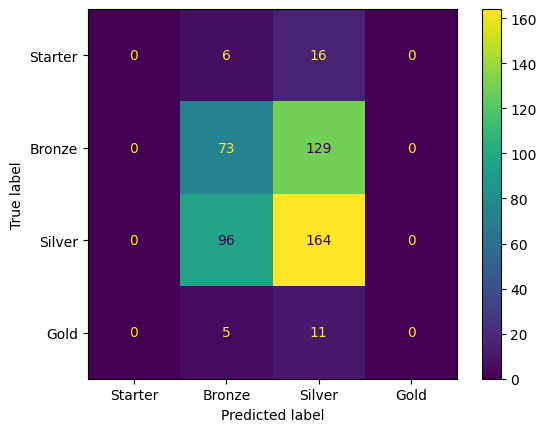

In [101]:
# Mostrar Matriz de confusão
confusion_matrix_modelo = confusion_matrix(y, y_pred, labels=lista_segmentos)
disp = ConfusionMatrixDisplay(confusion_matrix_modelo, display_labels=lista_segmentos)
disp.plot()

### Tuning de Hiperparâmetros

In [102]:
# Ajustar hipermarametros do modelo usando Optuna
# min_samples_leaf = Mínimo de instâncias requerido para ser uma folha (nó final)
# max_depth = Profundidade máxima da árvore
# max_features = Número máximo de features a serem consideradas para dividir um nó
# criterion = Função para medir a qualidade de uma divisão
# splitter = Estratégia usada para dividir o nó
# ccp_alpha = Parâmetro de poda de custo-complexidade
# min_samples_split = Número mínimo de amostras necessárias para dividir um nó

In [103]:
def decisiontree_optuna(trial):
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_depth = trial.suggest_int('max_depth', 2, 8)

    dt_model.set_params(classifier__min_samples_leaf=min_samples_leaf)
    dt_model.set_params(classifier__max_depth=max_depth)

    scores = cross_val_score(dt_model, X, y, cv=cv_folds, scoring='accuracy')
    
    return scores.mean()


In [105]:
# Executar a automação de experimentos
estudo_decisiontree = optuna.create_study(direction='maximize')
estudo_decisiontree.optimize(decisiontree_optuna, n_trials=200)

[I 2025-03-23 08:11:47,701] A new study created in memory with name: no-name-b70b93f9-39db-4d6a-9275-f44b1039d301
[I 2025-03-23 08:11:47,793] Trial 0 finished with value: 0.4739917754851743 and parameters: {'min_samples_leaf': 4, 'max_depth': 8}. Best is trial 0 with value: 0.4739917754851743.
[I 2025-03-23 08:11:47,856] Trial 1 finished with value: 0.4739917754851743 and parameters: {'min_samples_leaf': 12, 'max_depth': 6}. Best is trial 0 with value: 0.4739917754851743.
[I 2025-03-23 08:11:47,914] Trial 2 finished with value: 0.4739917754851743 and parameters: {'min_samples_leaf': 3, 'max_depth': 6}. Best is trial 0 with value: 0.4739917754851743.
[I 2025-03-23 08:11:47,989] Trial 3 finished with value: 0.4620037034365005 and parameters: {'min_samples_leaf': 20, 'max_depth': 2}. Best is trial 0 with value: 0.4739917754851743.
[I 2025-03-23 08:11:48,048] Trial 4 finished with value: 0.4600197195969507 and parameters: {'min_samples_leaf': 20, 'max_depth': 3}. Best is trial 0 with value

In [106]:
# Mostrar melhor resultado e melhor conjunto de hiperparametros
print(f'Melhor acurácia: {estudo_decisiontree.best_value}')
print(f'Melhor conjunto de hiperparametros: {estudo_decisiontree.best_params}')

Melhor acurácia: 0.4740518962075848
Melhor conjunto de hiperparametros: {'min_samples_leaf': 15, 'max_depth': 2}
